# Geospatial Data Carpentry

For this practice, you will build on what you have learned and your previous data carpentry skills to acquire, stage, ingest, and render various datasets.

We will be accessing data linked at the US Government's Geospatial Platform: https://www.geoplatform.gov/


All the datasets will be in different formats. Some you may have seen, some will be new.
 * [New Mexico Populated Places (GNIS), 2009](http://gstore.unm.edu/apps/rgis/datasets/c73b5e4d-fd64-4a2c-8a93-668e47d982d8/gnis_nm_poppl09.derived.csv)
 * [Bureau of Land Management Land Grant Boundaries](http://gstore.unm.edu/apps/rgis/datasets/3d23ac95-2b28-4c1f-b5cc-b656133a018f/land_grants.original.zip/)
 * http://gstore.unm.edu/apps/rgis/datasets/b4ae8f53-8dff-46bb-9058-e5501cabdd1b/school_district_boundaries.derived.gml
 * http://gstore.unm.edu/apps/rgis/datasets/ab17adb4-0992-436b-8ae4-575d8405d188/gpsrdsddshp.derived.kml

These datasets, while discoverable on geoplatform.gov are hosted at the University of New Mexico.

## A first Data Set

The first dataset we will work with is [http://gstore.unm.edu/apps/rgis/datasets/c73b5e4d-fd64-4a2c-8a93-668e47d982d8/gnis_nm_poppl09.derived.csv](http://gstore.unm.edu/apps/rgis/datasets/c73b5e4d-fd64-4a2c-8a93-668e47d982d8/gnis_nm_poppl09.derived.csv).

Read about this dataset [here](https://catalog.data.gov/dataset/new-mexico-populated-places-gnis-2009).

### Acquire
If you click the link in the bullet-list above, your browser will try to download a [ZIP file](https://en.wikipedia.org/wiki/Zip_%28file_format%29).
We can do this in Python using CURL Library as well as a few other tools.

In [10]:
import urllib.request
import shutil
from pathlib import Path

In [2]:
# Designate the URL for a file we want;
file_URL = 'http://gstore.unm.edu/apps/rgis/datasets/c73b5e4d-fd64-4a2c-8a93-668e47d982d8/gnis_nm_poppl09.derived.csv'

# Designate the local filename
local_file_name = 'gnis_nm_populated_place.zip'

# Designate the local file name with a path to a temp directory.
     # Your Repo comes with this folder.  If not, use terminal and 
     # navigate to course folder > module2 and them : mkdir temp
file_Path = Path('../temp/')  
file_Path /= local_file_name


# Download the file from `url` and save it locally under `file_name`:
with urllib.request.urlopen(file_URL) as response,  file_Path.open(mode='w+b') as out_file:
    shutil.copyfileobj(response, out_file)
    


The above cell will open the URL and pull the HTTP Response Data into the binary file specified in the `temp/` directory of `module2`.

Using a Terminal:
 * Replace "course_folder" with the actual course folder name!
```BASH
cd course_folder/module2/temp
ls -lt
total 288
-rw-r--r-- 1 scottgs dsa_user 294807 Jan 14 11:15 gnis_nm_populated_place.zip
```

### Stage 
Then we peek inside the file, notice the "-l" ... lower case el.
```BASH
unzip -l gnis_nm_populated_place.zip 

Archive:  gnis_nm_populated_place.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   235767  01-05-2018 12:38   gnis_nm_poppl09.csv
    58782  01-05-2018 12:38   gnis_nm_poppl09.csv.xml
---------                     -------
   294549                     2 files
```
  * Repeating without the -l will unpack the files! **Do that now**.

We are very familiar with CSV files, so you can just load it up with Pandas.
Please refer to the recipe in your [GeoPandas Information Sheet](../../resources/GeoPandasInfoSheet.pdf), as well as the [API documentation for the shapely package](http://shapely.readthedocs.io/en/stable/manual.html).

### Ingest and Render

#### TODO: 
 1. Load data with Pandas
 2. Convert to GeoPanda data with geometry
 3. Render points!


In [4]:
## M2:P1:Cell01
## ----- Add Ingestion Code Below -----------
import pandas as pd
import geopandas as gpd
df = pd.read_csv('../temp/gnis_nm_poppl09.csv')
df.head()

,SOURCE_LAT,Object_ID,FEATURE_ID,FEATURE_NA,FEATURE_CL,STATE_ALPH,STATE_NUME,COUNTY_NAM,COUNTY_NUM,PRIMARY_LA,...,PRIM_LAT_D,PRIM_LONG1,SOURCE_LON,SOURCE_L_1,SOURCE_L_2,ELEVATION,MAP_NAME,DATE_CREAT,DATE_EDITE,observed
0,NaN,2211.0,2413618.0,Canyon del Rio,Populated Place,NM,35.0,Valencia,61.0,343626N,...,34.607173,-106.537676,NaN,NaN,NaN,1701.0,Tome SE,2008/03/11,NaN,NaN
1,NaN,2210.0,2375434.0,La Cienega,Populated Place,NM,35.0,Torrance,57.0,343458N,...,34.582778,-106.329722,NaN,NaN,NaN,2123.0,Punta de Agua,2008/02/11,NaN,NaN
2,NaN,2209.0,2375433.0,Los Chavez,Populated Place,NM,35.0,Torrance,57.0,343643N,...,34.611944,-106.340000,NaN,NaN,NaN,2107.0,Punta de Agua,2008/02/11,NaN,NaN
3,NaN,2207.0,2055903.0,Canyon Estates,Populated Place,NM,35.0,Bernalillo,1.0,350456N,...,35.082269,-106.381135,NaN,NaN,NaN,1931.0,Tijeras,1992/08/31,NaN,NaN
4,NaN,2216.0,2413664.0,Rio Communities,Populated Place,NM,35.0,Valencia,61.0,343859N,...,34.649593,-106.734030,NaN,NaN,NaN,1471.0,Tome,2008/03/11,NaN,NaN


In [7]:
## M2:P1:Cell02
## ----- Add more Ingestion Code Below -----------
from geopandas import GeoDataFrame
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df.PRIM_LONG1, df.PRIM_LAT_D)]
crs = {'init': 'epsg:4326'} 
geo_df = GeoDataFrame(df, crs=crs, geometry=geometry)

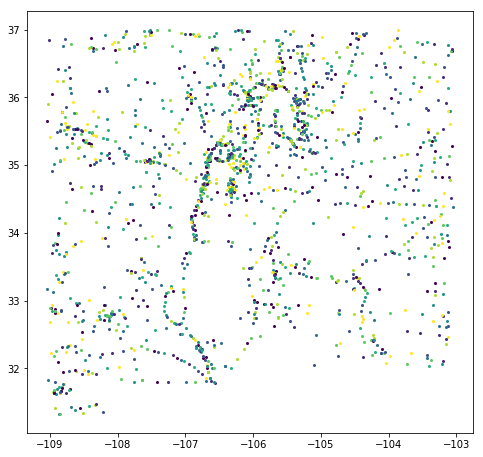

In [9]:
## M2:P1:Cell03
## ----- Add Render Code Below -----------
geo_df.plot(figsize=(8,8))





## A Second Data Set

The second dataset we will work with is [http://gstore.unm.edu/apps/rgis/datasets/3d23ac95-2b28-4c1f-b5cc-b656133a018f/land_grants.original.zip](http://gstore.unm.edu/apps/rgis/datasets/3d23ac95-2b28-4c1f-b5cc-b656133a018f/land_grants.original.zip).

Read about this dataset [here](https://catalog.data.gov/dataset/bureau-of-land-management-land-grant-boundaries).

### Acquire and Stage
If you click the link in the bullet-list above, your browser will try to download a [ZIP file](https://en.wikipedia.org/wiki/Zip_%28file_format%29).

Repeat the steps above.
However, be cautious that ZIP file in this case contains the setof files that make of the Shapefile format.

![images/land_grants_zip.png MISSING](../images/land_grants_zip.png)

You should create a sub-folder in `temp/` named **`land_grants`** and unzip the files in there!

In [13]:
## M2:P1:Cell04
## ----- Add Acquisition Code Below -----------
# Designate the URL for a file we want;
file_URL = ' http://gstore.unm.edu/apps/rgis/datasets/3d23ac95-2b28-4c1f-b5cc-b656133a018f/land_grants.original.zip'

# Designate the local filename
local_file_name = 'land_grants'

# Designate the local file name with a path to a temp directory.
     # Your Repo comes with this folder.  If not, use terminal and 
     # navigate to course folder > module2 and them : mkdir temp
file_Path = Path('../temp/')  
file_Path /= local_file_name


# Download the file from `url` and save it locally under `file_name`:
with urllib.request.urlopen(file_URL) as response,  file_Path.open(mode='w+b') as out_file:
    shutil.copyfileobj(response, out_file)
    

### Ingest and Render

See your labs and related material!

In [33]:
import fiona
import json

GEODATA_FILE = '../temp/land_grants'

## M2:P1:Cell05
## ----- Add Exploration (Fiona) Code Below -----------
numLayers = len(fiona.listlayers(GEODATA_FILE))

for i, name in enumerate(fiona.listlayers(GEODATA_FILE)):
    with fiona.open(GEODATA_FILE, layer=i) as current_layer:
        print("[{}/{}] Layer {} has {} features".format((i+1),numLayers,name,len(current_layer)))


[1/1] Layer land_grants has 222 features


In [34]:
## M2:P1:Cell06
## ----- Add Ingest Code Below -----------
g_df = gpd.read_file(GEODATA_FILE, layer ='land_grants')




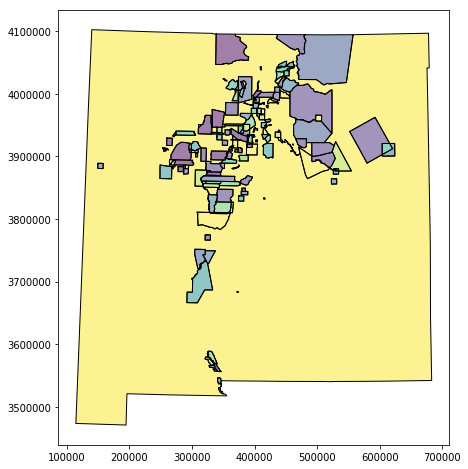

In [29]:
## M2:P1:Cell07
## ----- Add Render Code Below -----------
g_df.plot(figsize=(8,8))




### The last two files will be part of an exercise.  

#### <span style="background:yellow">They will require some more advanced parsing, as they are both XML derivative file formats.</span>

# Save Your Notebook
## Then Notebook Menu: File > Close and Halt